# Week 4 handin

## 01 Assignment

# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020


## 02 Status

## 03 Solution part 1

In [1]:
#Exercise 1.1 & 1.2:

In [2]:
import numpy as np

statkode_file = 'data/befkbhalderstatkode.csv'

def csv_to_numpy(filename=statkode_file):
    with open(filename) as file_object:
        np_array = np.genfromtxt(file_object, delimiter=',', dtype=np.uint, skip_header=1)
    return np_array

statkode_output = csv_to_numpy()
print(statkode_output)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [3]:
#Exercise 1.3:

In [4]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

def amount_each_area(statkode=statkode_output, neighb_dict=neighb):
    amount_dict = {}
    
    for area in neighb_dict:
        # Create amount_dict skeleton:
        amount_dict[area] = 0
        # Add the amount of people with the given area code (this is probably not done as intended; 
            # performance is also really slow)
        for line in statkode:
            if line[0] == 2015 and line[1] == area:
                amount_dict[area] += int(line[-1])
                
    return amount_dict
        
amount_each_area_dict = amount_each_area()
print(amount_each_area_dict)

{1: 51937, 2: 75113, 3: 78802, 4: 61623, 5: 51727, 6: 39537, 7: 43908, 8: 53604, 9: 55205, 10: 64967, 99: 3872}


In [5]:
#Exercise 1.4:

Text(0, 0.5, 'Size')

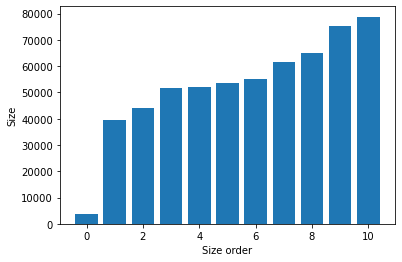

In [6]:
import matplotlib.pyplot as plt

amount_each_area_dict_sorted = dict(sorted(amount_each_area_dict.items(), key=lambda item: item[1]))

plt.bar(np.arange(len(amount_each_area_dict_sorted)), amount_each_area_dict_sorted.values())
# I would like to find a way to give "Size order" the name of the area codes instead of the range from smallest to largest
    # so it's possible to see which area has the given size...
plt.xlabel("Size order")
plt.ylabel("Size")


In [7]:
#Exercise 1.5 & 1.6:

In [32]:
def people_over_age_in_year(statkode=statkode_output, year=2015, age=65, is_all=True):
    result = 0
    # All people:
    if is_all == True:
        mask = (statkode[:, 2] >= age) & (statkode[:, 0] == year) & (statkode[:, 1] != 99)
    # Only nordic people exept DK:
    else:
        codes = [5104, 5110, 5120]
        mask = (statkode[:, 2] >= age) & (statkode[:, 0] == year) & (statkode[:, 1] != 99) & np.isin(statkode[:, 3], [5104, 5110, 5120])
    
    for boolean in mask:
        if np.any(boolean):
            result += 1
    return result

print("65 or above in 2015 (exercise 1.5):", people_over_age_in_year())
print("65 or above in 2015 other nordic countries (exercise 1.6):", people_over_age_in_year(is_all=False))

65 or above in 2015 (exercise 1.5): 2807
65 or above in 2015 other nordic countries (exercise 1.6): 332


In [33]:
#Exercise 1.7:

In [38]:
new = (statkode_output[:,0] == 1992)
new_2 = (statkode_output[:,0] == 1993)
new_3 = np.vstack((new, new_2))

print(new)
print(new_2)
print(new_3)

[False False False ...  True  True  True]
[False False False ... False False False]
[[False False False ...  True  True  True]
 [False False False ... False False False]]
